## Stroke Prediction Analysis
## Authors: 
#### Nathan Um, Bikas Gidda, Jatinder Mann, Benjamin Shafer

## Introduction

According to the world healthcare organization, having a stroke is the second major leading cause of deaths globally and their data shows 11% of the world's population suffer from this disease.


This dataset is going to predict if the patient is likely to get a stroke or not in their lifetime. In this dataset, hospitals collected the information from patients that are dealing with heart disease, diabetes or hypertension.


##Description of Data Set:


### The dataset includes patient information in each row.


1. Patient Id
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Dataset Source (https://www.kaggle.com/datasets/godfatherfigure/healthcare-dataset-stroke-data) 



## Predictions:


With this dataset, we can use the features to see what are the major causes of having a stroke. Finding out the major causes of a stroke can help people who may be at risk to better avoid having a stroke in the future. Our prediction is that using the features of age, gender, heart disease, and the patients average glucose level we can predict for other people whether or not they will have a stroke. 

## Features used as predictors:
"gender", "age" , "heart_disease", "avg_glucose_level"

In [2]:
#Choice of DataSet
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
df = pd.read_csv("https://raw.githubusercontent.com/jmann-csumb/project1/main/healthcare-dataset-stroke-data.csv")
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
print("% Missing Values in Data Set:")
df.isnull().sum()

% Missing Values in Data Set:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Count Patient with Stroke or Not
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
#Drop ID and Refresh columns
df.drop(['id'], axis='columns', inplace=True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
#Describe Data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#Visualization of Data

Text(0.5, 1.0, 'Patient Age vs Stroke')

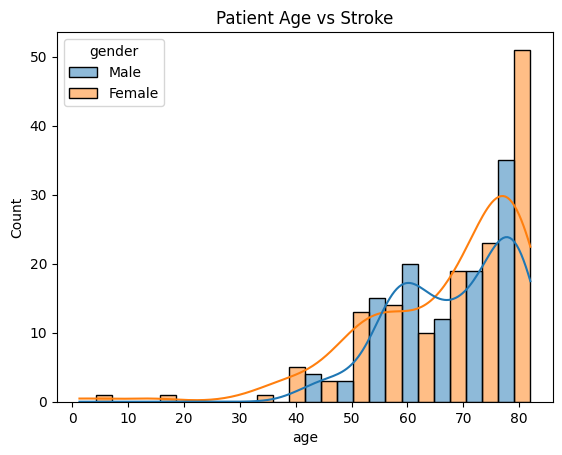

In [10]:

sns.histplot(data=df[df['stroke']==1],x='age',hue='gender',stat='count',multiple='dodge',kde=True)
plt.title('Patient Age vs Stroke')

Text(0.5, 1.0, 'Patient Glucose Level vs Stroke')

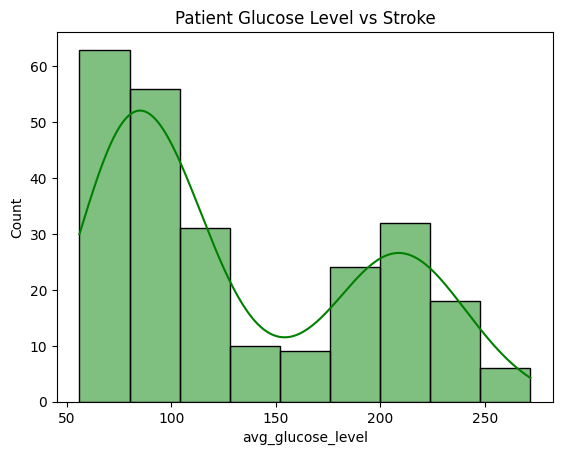

In [11]:
sns.histplot(data=df[df['stroke']==1],x='avg_glucose_level',stat='count',color='g',kde=True)
plt.title('Patient Glucose Level vs Stroke')

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64

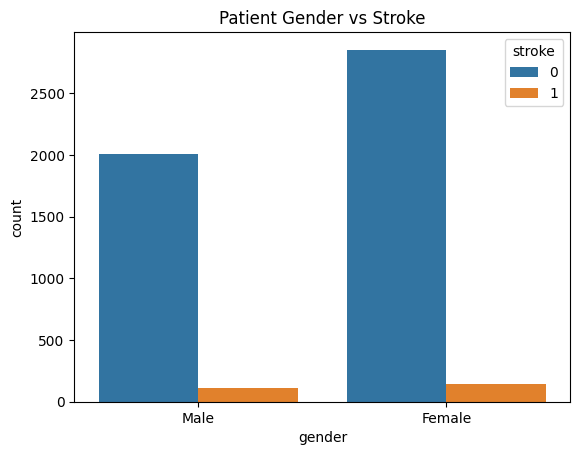

In [12]:
df = df.drop([3116]) # drops uneeded 'Other' Category in Gender column 
sns.countplot(x='gender',hue='stroke',data=df)
plt.title('Patient Gender vs Stroke',fontsize=12,ha='center')
df.groupby(['gender','stroke']).size()


Text(0.5, 1.0, 'Heart Disease vs Stroke')

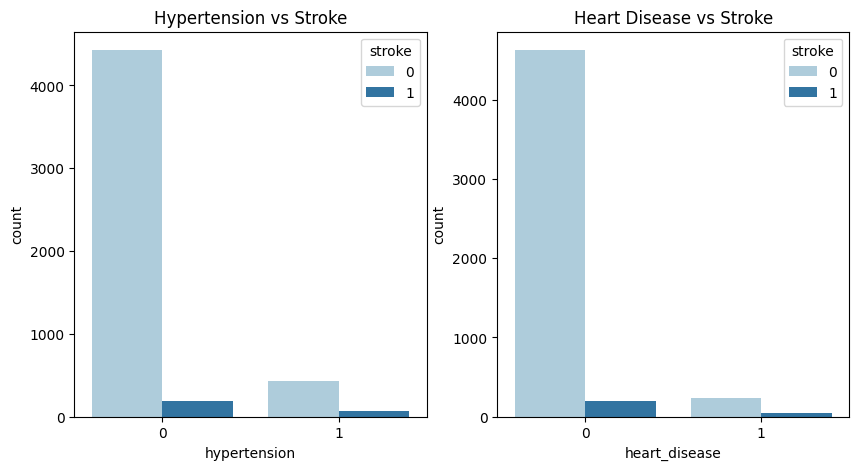

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='hypertension',hue='stroke',data=df,ax=ax[0],palette='Paired')
ax[0].set_title('Hypertension vs Stroke')

sns.countplot(x='heart_disease',hue='stroke',data=df,ax=ax[1],palette='Paired')
ax[1].set_title('Heart Disease vs Stroke')

#Preprocessing Steps

In [14]:

# Convert categorical data to numeric


def gender(x):
	if x == 'Female':
		return 0
	elif x == 'Male':
		return 1
	else:
		return 2
    
df['gen_num'] = df['gender'].apply(gender)

In [15]:
# Scale the data for improved accuracy
df[['age', 'avg_glucose_level']] = zscore(df[['age', 'avg_glucose_level']], axis=0)

# Machine Learning

In [16]:
#Work for Machine Learning
predictors = ['gen_num', 'age', 'heart_disease', 'avg_glucose_level']
target= 'stroke'
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
accuracy = (predicted == y_test).mean()
print(accuracy)


0.9393346379647749


Text(0.5, 1.0, 'Count of Stroke Patients for Test Values')

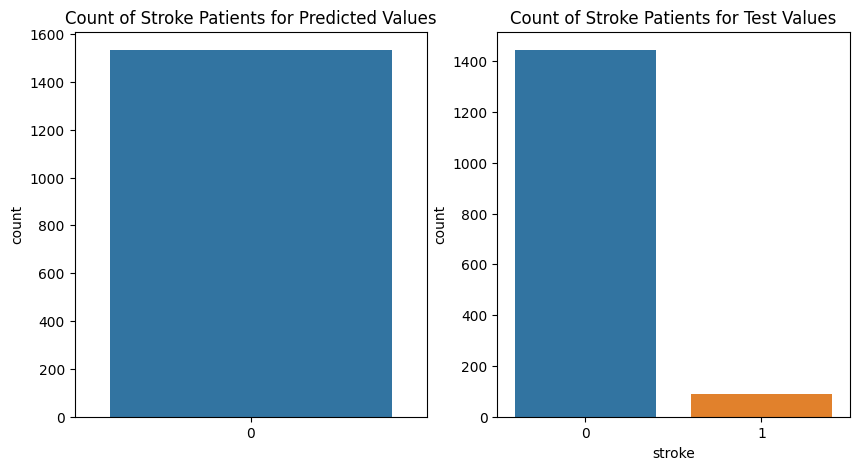

In [22]:

fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot( x = predicted, ax =ax[0])
ax[0].set_title("Count of Stroke Patients for Predicted Values")

sns.countplot(x =  y_test , ax=ax[1])
ax[1].set_title("Count of Stroke Patients for Test Values")



#Prediction Heatmap

<Axes: >

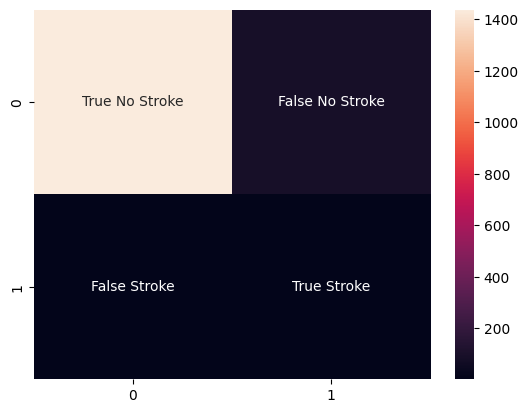

In [18]:
matrix = confusion_matrix(predicted, y_test)
labels = ['True No Stroke','False No Stroke','False Stroke','True Stroke']
labels = py.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot = labels, fmt = '')


## Prediction Using Features (Gender, Age, previous record of Heart Disease, and Avg Glucose Level)
With these features the RMSE accuracy is 94% which shows that using these features can help predict whether or not a patient will have a stroke or not. \
Even so the probability that a patient will have a stroke best off the test data is 89 out of 1500 patients or around 5%. Let's see if we can narrow down our results with more specific features. 

In [19]:
#Work for Machine Learning
predictors = ['heart_disease', 'avg_glucose_level']
target= 'stroke'
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
accuracy = (predicted == y_test).mean()
print(accuracy)

0.9419439008480104


Text(0.5, 1.0, 'Count of Stroke Patients for Test Values')

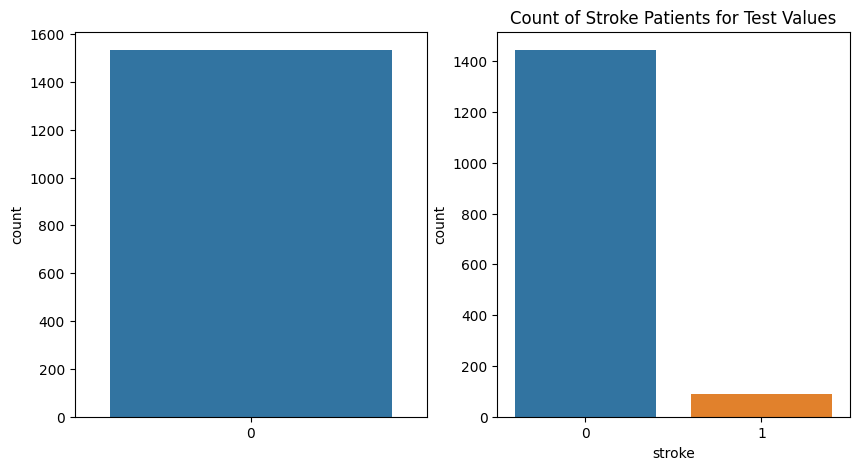

In [20]:
#Plot for Machine Learning with 2 Features
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot( x = predicted, ax =ax[0])
plt.title("Count of Stroke Patients for Predicted Values")

sns.countplot(x =  y_test , ax=ax[1])
plt.title("Count of Stroke Patients for Test Values")

## Results with Features (Heart Disease, Average Glucose Level)
With the features Heart Disease and Average Glucose Level ,there is not enough data to accurately predict whether a patient will suffer from a stroke. It seems as if gender and age are a key part in predicting whether or not a patient will suffer from a stroke along with a patients history in heart disease and their average glucose level. 

# Results
With the result of the Machine Learning Algorithm and the features we chose to use , we were able to prove that gender ,age, a patients history of heart disease, and a patients average glucose level are sufficient predictors to determine whether or not a patient will suffer from a stroke in their life. \
We also were able to show that gender and age prove to be a huge determinent for a patients risk of having a stoke based off the data we got by only using features history of heart disease and average glucose level. \
Unfortunatley this means that the risk of a stroke isn't determined by a persons lifestyle, but more so of their age. Even so maintaing a healthy glucose level and avoidind your risk of having a heart disease will still improve a patients overall healty, but the risk of a stroke isnt determined by one feature but many features. We have come to the conclusion that multiple factors are the cause of a patient having a stroke and one specfic aspect of life is not enough to predict whether a patient will or will not have a stroke. 